In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as img
import cv2
import seaborn as sns

In [2]:
passing=pd.read_csv(r"passingevents.csv")

In [3]:
# 这是H队中所有球员的集合，D代表后卫，M代表中场，F代表前锋，G代表门将
set(passing[passing.TeamID=='Huskies'].OriginPlayerID)

{'Huskies_D1',
 'Huskies_D10',
 'Huskies_D2',
 'Huskies_D3',
 'Huskies_D4',
 'Huskies_D5',
 'Huskies_D6',
 'Huskies_D7',
 'Huskies_D8',
 'Huskies_D9',
 'Huskies_F1',
 'Huskies_F2',
 'Huskies_F3',
 'Huskies_F4',
 'Huskies_F5',
 'Huskies_F6',
 'Huskies_G1',
 'Huskies_M1',
 'Huskies_M10',
 'Huskies_M11',
 'Huskies_M12',
 'Huskies_M13',
 'Huskies_M2',
 'Huskies_M3',
 'Huskies_M4',
 'Huskies_M5',
 'Huskies_M6',
 'Huskies_M7',
 'Huskies_M8',
 'Huskies_M9'}

In [21]:
# passing涵盖了H队参加的比赛里面所有的成功传球，matchID代表比赛场次，MatchPeriod代表上/下半场，EventSubType代表传球种类
passing.head()

,MatchID,TeamID,OriginPlayerID,DestinationPlayerID,MatchPeriod,EventTime,EventSubType,EventOrigin_x,EventOrigin_y,EventDestination_x,EventDestination_y
0,1,Huskies,Huskies_D1,Huskies_F1,1H,46.323501,Head pass,34,97,59.0,95.0
1,1,Huskies,Huskies_M1,Huskies_F2,1H,51.022546,Simple pass,53,89,69.0,91.0
2,1,Opponent1,Opponent1_D2,Opponent1_G1,1H,89.008721,Simple pass,19,16,5.0,50.0
3,1,Opponent1,Opponent1_G1,Opponent1_F1,1H,92.216160,Launch,5,50,67.0,44.0
4,1,Huskies,Huskies_M2,Huskies_M3,1H,98.265191,Simple pass,42,55,36.0,54.0


In [22]:
# 传球种类，不懂的直接google就可以了
set(passing.EventSubType)

{'Cross',
 'Hand pass',
 'Head pass',
 'High pass',
 'Launch',
 'Simple pass',
 'Smart pass'}

In [23]:
# 所有本队的传球
our_passing = passing[passing.OriginPlayerID =='Huskies_M1' ]
our_passing.head()

,MatchID,TeamID,OriginPlayerID,DestinationPlayerID,MatchPeriod,EventTime,EventSubType,EventOrigin_x,EventOrigin_y,EventDestination_x,EventDestination_y
1,1,Huskies,Huskies_M1,Huskies_F2,1H,51.022546,Simple pass,53,89,69.0,91.0
40,1,Huskies,Huskies_M1,Huskies_D1,1H,413.899208,Simple pass,31,99,27.0,88.0
61,1,Huskies,Huskies_M1,Huskies_D1,1H,492.913649,Simple pass,49,97,40.0,86.0
83,1,Huskies,Huskies_M1,Huskies_D2,1H,658.984182,Simple pass,46,66,35.0,53.0
89,1,Huskies,Huskies_M1,Huskies_D1,1H,672.485389,Simple pass,54,98,40.0,88.0


In [3]:
events = pd.read_csv('fullevents.csv')

In [4]:
matches = pd.read_csv("matches.csv")

In [5]:
# 所有比赛的事件 EventType表示事件类型（比如传球） EventSubType表示事件的子类型（比如传球-传中）
events.head()

,MatchID,TeamID,OriginPlayerID,DestinationPlayerID,MatchPeriod,EventTime,EventType,EventSubType,EventOrigin_x,EventOrigin_y,EventDestination_x,EventDestination_y
0,1,Huskies,Huskies_G1,NaN,1H,31.174681,Free Kick,Goal kick,0.0,0.0,66.0,89.0
1,1,Opponent1,Opponent1_D1,NaN,1H,33.730326,Duel,Air duel,34.0,11.0,22.0,0.0
2,1,Huskies,Huskies_F1,NaN,1H,33.812965,Duel,Air duel,66.0,89.0,78.0,100.0
3,1,Opponent1,Opponent1_D2,NaN,1H,42.611028,Free Kick,Throw in,22.0,0.0,66.0,3.0
4,1,Huskies,Huskies_D1,Huskies_F1,1H,46.323501,Pass,Head pass,34.0,97.0,59.0,95.0


In [7]:
matches

,MatchID,OpponentID,Outcome,OwnScore,OpponentScore,Side,CoachID
0,1,Opponent1,win,1,0,home,Coach1
1,2,Opponent2,tie,1,1,away,Coach1
2,3,Opponent3,loss,0,2,away,Coach1
3,4,Opponent4,loss,0,3,home,Coach1
4,5,Opponent5,loss,0,4,away,Coach1
5,6,Opponent6,win,2,1,home,Coach1
6,7,Opponent7,loss,0,1,home,Coach1
7,8,Opponent8,tie,1,1,away,Coach1
8,9,Opponent9,loss,2,5,home,Coach1
9,10,Opponent10,loss,0,2,away,Coach2


In [74]:
import pandas_profiling

In [75]:
profile = pandas_profiling.ProfileReport(events)
profile.to_file("events.html")

In [8]:
plt_info=passing.sample(n=250,axis=0)

In [8]:
plt_info.EventOrigin_x*=(1.05/100)
plt_info.EventOrigin_y*=(0.69/100)
plt_info.EventDestination_x*=(1.05/100)
plt_info.EventDestination_y*=(0.69/100)

In [79]:
plt_info['Pass_x']=plt_info.EventDestination_x-plt_info.EventOrigin_x
plt_info['Pass_y']=plt_info.EventDestination_y-plt_info.EventOrigin_y

In [80]:
plt_info

,MatchID,TeamID,OriginPlayerID,DestinationPlayerID,MatchPeriod,EventTime,EventType,EventSubType,EventOrigin_x,EventOrigin_y,EventDestination_x,EventDestination_y,Pass_x,Pass_y
46127,30,Huskies,Huskies_D3,Huskies_G1,1H,2466.872336,Pass,Simple pass,0.2940,0.3864,0.1155,0.2346,-0.1785,-0.1518
51334,33,Huskies,Huskies_D1,NaN,2H,1859.711484,Others on the ball,Touch,0.3255,0.3174,0.4725,0.3036,0.1470,-0.0138
27507,18,Huskies,Huskies_F2,NaN,1H,2727.984227,Duel,Ground attacking duel,0.9765,0.5865,0.9555,0.5934,-0.0210,0.0069
11458,8,Huskies,Huskies_D1,NaN,1H,1863.556698,Others on the ball,Touch,0.0735,0.2001,0.0000,0.3519,-0.0735,0.1518
41450,27,Opponent12,Opponent12_F2,NaN,1H,1813.990228,Duel,Ground attacking duel,0.5775,0.2622,0.6195,0.3381,0.0420,0.0759
35464,23,Huskies,Huskies_M13,Huskies_D3,2H,42.963659,Pass,Simple pass,0.3885,0.2553,0.3045,0.1311,-0.0840,-0.1242
23054,15,Huskies,Huskies_F2,Huskies_D2,2H,1034.691232,Pass,Simple pass,0.6720,0.1035,0.4200,0.0966,-0.2520,-0.0069
19706,13,Opponent13,Opponent13_M1,Opponent13_M3,2H,399.210024,Pass,Simple pass,0.8610,0.0207,0.6720,0.0138,-0.1890,-0.0069
46278,30,Opponent8,Opponent8_F1,Opponent8_M1,2H,231.012641,Pass,Simple pass,0.4620,0.0759,0.4620,0.1863,0.0000,0.1104
42418,28,Opponent11,Opponent11_D5,Opponent11_G2,1H,50.995814,Pass,Simple pass,0.2205,0.2415,0.1260,0.4278,-0.0945,0.1863


(0, 0.69)

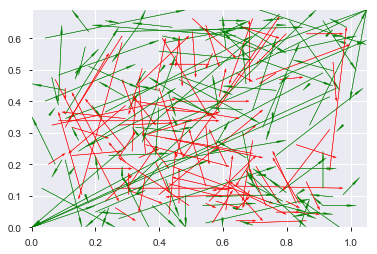

In [81]:
for i in plt_info.itertuples():
    if not isinstance(i.DestinationPlayerID,str):
        plt.arrow(i.EventOrigin_x,i.EventOrigin_y,i.Pass_x,i.Pass_y,color='g',length_includes_head=True,head_width=0.006,
              head_length=0.03,)
    else:
        plt.arrow(i.EventOrigin_x,i.EventOrigin_y,i.Pass_x,i.Pass_y,color='r',length_includes_head=True,head_width=0.006,
              head_length=0.01,)
plt.xlim(0,1.05)
plt.ylim(0,0.69)

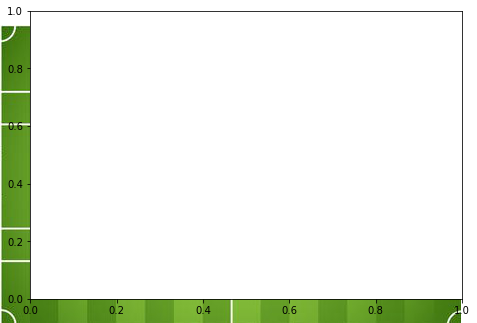

In [25]:
fig=plt.figure()
bgimg = img.imread(r'bgc_2.jpg')
fig.figimage(bgimg)
ax = fig.add_axes([0,0,1.0,1.0])

In [26]:
plt_info=passing.sample(n=100,axis=0)

plt_info.EventOrigin_x/=100
plt_info.EventOrigin_y/=100
plt_info.EventDestination_x/=100
plt_info.EventDestination_y/=100

plt_info['Pass_x']=plt_info.EventDestination_x-plt_info.EventOrigin_x
plt_info['Pass_y']=plt_info.EventDestination_y-plt_info.EventOrigin_y

for i in plt_info.itertuples():
    if not isinstance(i.DestinationPlayerID,str):
        ax.arrow(i.EventOrigin_x,i.EventOrigin_y,i.Pass_x,i.Pass_y,color='purple',length_includes_head=True,head_width=0.006,
              head_length=0.01,)
    else:
        ax.arrow(i.EventOrigin_x,i.EventOrigin_y,i.Pass_x,i.Pass_y,color='r',length_includes_head=True,head_width=0.006,
              head_length=0.01,)

In [27]:
ax.set_axis_off()

In [28]:
fig.savefig('1.jpg')

In [69]:
plt_info=passing.sample(n=250,axis=0)

plt_info.EventOrigin_x/=100
plt_info.EventOrigin_y/=100
plt_info.EventDestination_x/=100
plt_info.EventDestination_y/=100

plt_info.EventOrigin_x*=461
plt_info.EventOrigin_y*=298
plt_info.EventDestination_x*=461
plt_info.EventDestination_y*=298

plt_info['Pass_x']=plt_info.EventDestination_x-plt_info.EventOrigin_x
plt_info['Pass_y']=plt_info.EventDestination_y-plt_info.EventOrigin_y

plt_info=plt_info[(1-plt_info.EventDestination_x.isnull()).astype('bool')]

for i in plt_info.itertuples():
    if not isinstance(i.DestinationPlayerID,str):
        img = cv2.arrowedLine(img, (round(i.EventOrigin_x),round(i.EventOrigin_y)), (round(i.EventDestination_x),round(i.EventDestination_y)), (0,0,255),1,4,0,0.15)
    else:
        img = cv2.arrowedLine(img, (round(i.EventOrigin_x),round(i.EventOrigin_y)), (round(i.EventDestination_x),round(i.EventDestination_y)), (255,0,0),1,4,0,0.15)

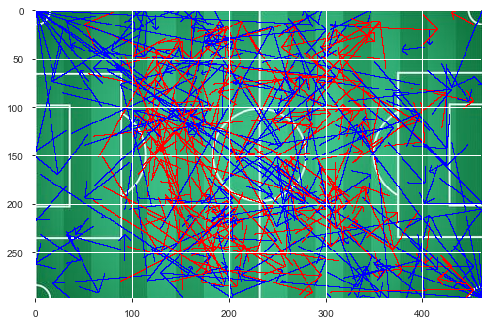

In [67]:
plt.imshow(img)

In [72]:
cv2.imwrite('1.jpg',img)

True

In [90]:
players = list(set(events[events.TeamID == 'Huskies'].OriginPlayerID))

In [117]:
# player为主键 传球数 ，短传数，传中树，长传数， 关键传球数，总传球距离，平均传球距离，平均纵深传球距离
player_pass = []
player_simple_pass = []
player_high_pass = []
player_cross =[]
player_head_pass = []
player_smart_pass = []
player_total_distance = []
player_average_distance = []
player_longtitude_distance = []
player_depth = []
for player in players:
    pas = 0
    simple_pass = 0
    high_pass = 0
    cross = 0
    head_pass = 0
    smart_pass = 0
    total_distance = 0
    longtitude_distance = 0
    depth = 0
    
    for i in passing.itertuples():
        if i.OriginPlayerID == player:
            pas+=1
            if i.EventSubType == 'Cross':
                cross+=1
            if i.EventSubType == 'Head pass':
                head_pass+=1
            if i.EventSubType == 'High pass':
                high_pass+=1
            if i.EventSubType == 'Simple pass':
                simple_pass+=1
            if i.EventSubType == 'Smart pass':
                smart_pass+=1
            total_distance+= np.sqrt((i.EventDestination_x-i.EventOrigin_x)**2 + ((i.EventDestination_y-i.EventOrigin_y)**2))
            longtitude_distance+= (i.EventDestination_y-i.EventOrigin_y)
            depth+= (i.EventDestination_x-i.EventOrigin_x)
            
    player_pass.append(pas)
    player_simple_pass.append(simple_pass)
    player_high_pass.append(high_pass)
    player_cross.append(cross)
    player_head_pass.append(head_pass)
    player_smart_pass.append(smart_pass)
    player_total_distance.append(total_distance)
    player_average_distance.append(total_distance/pas)
    player_longtitude_distance.append(longtitude_distance/pas)
    player_depth.append(depth/pas)

In [118]:
# player pandas
players_data = pd.DataFrame({'Name':players,'Pass':player_pass,'SimplePass':player_simple_pass,'HighPass':player_high_pass,
                            "Cross":player_cross,"HeadPass":player_head_pass,"SmartPass":player_smart_pass,"TotalDistance":player_total_distance,
                            "AverageDistance":player_average_distance,"Longtitude":player_longtitude_distance,"Depth":player_depth})

In [23]:
# match为主键,x距和y距
average_x = []
average_y = []
average_xy = []
for match in range(1,39):
    count_x = 0
    count_y = 0
    count_xy = 0
    x = 0
    y = 0
    xy = 0
    for i in passing.itertuples():
        if i.TeamID == 'Huskies' and int(i.MatchID) == match:
            x +=(i.EventDestination_x - i.EventOrigin_x)
            y +=(i.EventDestination_y - i.EventOrigin_y)
            xy +=((i.EventDestination_y - i.EventOrigin_y)/abs(i.EventDestination_x - i.EventOrigin_x+0.0001))
            count_x +=1
            count_y +=1
            count_xy +=1
    x/=count_x
    y/=count_y
    xy/=count_xy
    average_x.append(x)
    average_y.append(y)
    average_xy.append(xy)

In [66]:
# match为主键,x距和y距，对手的
oppo_average_x = []
oppo_average_y = []
oppo_average_xy = []
for match in range(1,39):
    count_x = 0
    count_y = 0
    count_xy = 0
    x = 0
    y = 0
    xy = 0
    for i in passing.itertuples():
        if i.TeamID != 'Huskies' and int(i.MatchID) == match:
            x +=(i.EventDestination_x - i.EventOrigin_x)
            y +=(i.EventDestination_y - i.EventOrigin_y)
            xy +=((i.EventDestination_y - i.EventOrigin_y)/abs(i.EventDestination_x - i.EventOrigin_x+0.0001))
            count_x +=1
            count_y +=1
            count_xy +=1
    x/=count_x
    y/=count_y
    xy/=count_xy
    oppo_average_x.append(x)
    oppo_average_y.append(y)
    oppo_average_xy.append(xy)

In [115]:
players_data.head()

,Name,Pass,SimplePass,HighPass,Cross,HeadPass,SmartPass,TotalDistance,AverageDistance,Longtitude
0,Huskies_D9,57,50,3,0,1,0,1807.058750,31.702785,1059.0
1,Huskies_M2,76,69,2,0,4,1,1579.727136,20.785883,9.0
2,Huskies_G1,473,152,67,0,0,0,19783.002385,41.824529,951.0
3,Huskies_F6,223,187,7,12,15,2,4259.658940,19.101610,-1146.0
4,Huskies_F2,859,749,65,11,17,14,21302.769700,24.799499,1856.0


In [31]:
# 传球数
pass_count = []
pass_propor = []
for match in range(1,39):
    count = 0
    simple_pass = 0
    for i in passing.itertuples():
        if i.TeamID == 'Huskies' and int(i.MatchID) == match:
            count +=1
            if i.EventSubType == 'Simple pass':
                simple_pass+=1
    pass_count.append(count)
    pass_propor.append(simple_pass/count)

In [39]:
# 对手的传球数
oppo_pass_count = []
oppo_pass_propor = []
for match in range(1,39):
    count = 0
    simple_pass = 0
    for i in passing.itertuples():
        if i.TeamID != 'Huskies' and int(i.MatchID) == match:
            count +=1
            if i.EventSubType == 'Simple pass':
                simple_pass+=1
    oppo_pass_count.append(count)
    oppo_pass_propor.append(simple_pass/count)

In [34]:
# 净胜球
diff=list(matches.OwnScore-matches.OpponentScore)

In [74]:
# 赛季pandas
season = pd.DataFrame({'MatchID':list(range(1,39)),'PassNumber':pass_count,'SimplePassPropotional':pass_propor,
                       'OpponentPassNumber':oppo_pass_count, 'OpponentSimplePassPropotional': oppo_pass_propor,
                      'AverageLongtitude':average_y,'OpponentAverageLongtitude':oppo_average_y,'GoalDifference':diff})

In [76]:
season.head()

,MatchID,PassNumber,SimplePassPropotional,OpponentPassNumber,OpponentSimplePassPropotional,AverageLongtitude,OpponentAverageLongtitude,GoalDifference
0,1,369,0.891599,197,0.756345,-0.536585,0.203046,1
1,2,180,0.833333,416,0.899038,-0.683333,0.463942,0
2,3,324,0.907407,471,0.912951,1.052469,-0.329087,-2
3,4,354,0.836158,345,0.814493,-0.319209,1.379710,-3
4,5,382,0.895288,373,0.906166,-0.212042,-1.412869,-4


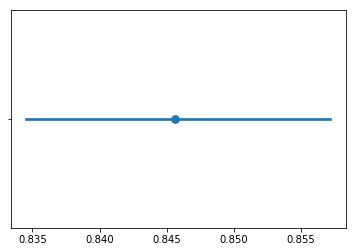

In [113]:
sns.pointplot(np.asarray((pass_propor,oppo_pass_propor)))

Text(0.5, 1.0, 'The relationship between number of pass and goal difference')

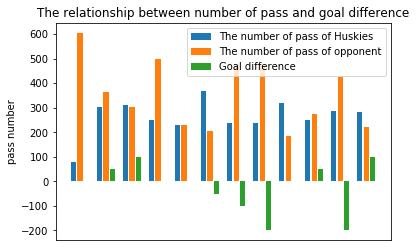

In [58]:
plt.bar(range(0,48,4),pass_count[15:27],label = 'The number of pass of Huskies')
plt.bar(range(1,49,4),oppo_pass_count[15:27], label = 'The number of pass of opponent')
plt.bar(range(2,50,4),np.asarray(diff[15:27])*50, label = 'Goal difference')
plt.legend()

# plt.xlabel('')
plt.xticks([])  

plt.ylabel('pass number')

plt.title('The relationship between number of pass and goal difference')

Text(0.5, 1.0, 'The relationship between propotion of simple pass and goal difference')

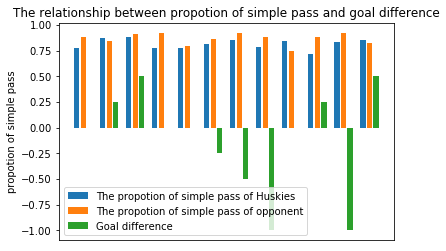

In [61]:
plt.bar(range(0,48,4),pass_propor[15:27],label = 'The propotion of simple pass of Huskies')
plt.bar(range(1,49,4),oppo_pass_propor[15:27], label = 'The propotion of simple pass of opponent')
plt.bar(range(2,50,4),np.asarray(diff[15:27])*0.25, label = 'Goal difference')
plt.legend()

# plt.xlabel('')
plt.xticks([])  

plt.ylabel('propotion of simple pass')

plt.title('The relationship between propotion of simple pass and goal difference')

Text(0.5, 1.0, 'The relationship between passing longitudinal distance and goal difference')

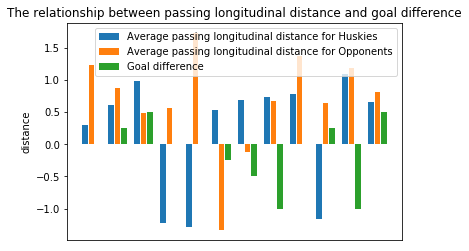

In [67]:
plt.bar(range(0,48,4),average_y[15:27],label = 'Average passing longitudinal distance for Huskies')
plt.bar(range(1,49,4),oppo_average_y[15:27], label = 'Average passing longitudinal distance for Opponents')
plt.bar(range(2,50,4),np.asarray(diff[15:27])*0.25, label = 'Goal difference')
plt.legend()

# plt.xlabel('')
plt.xticks([])  

plt.ylabel('distance')

plt.title('The relationship between passing longitudinal distance and goal difference')

Text(0.5, 1.0, 'The relationship between passing lateral distance and goal difference')

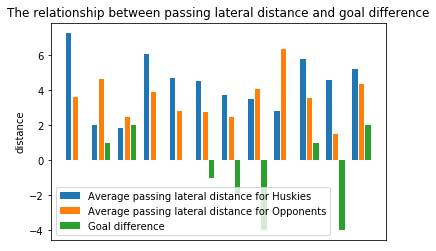

In [69]:
plt.bar(range(0,48,4),average_x[15:27],label = 'Average passing lateral distance for Huskies')
plt.bar(range(1,49,4),oppo_average_x[15:27], label = 'Average passing lateral distance for Opponents')
plt.bar(range(2,50,4),np.asarray(diff[15:27]), label = 'Goal difference')
plt.legend()

# plt.xlabel('')
plt.xticks([])  

plt.ylabel('distance')

plt.title('The relationship between passing lateral distance and goal difference')

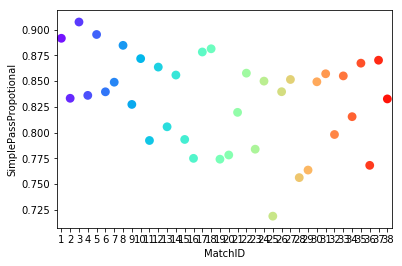

In [121]:
sns.pointplot(data = season,x = 'MatchID',y = 'SimplePassPropotional',palette='rainbow',title="Propotional of simple pass in the season")

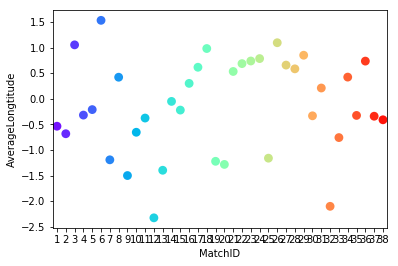

In [135]:
sns.pointplot(data = season,x = 'MatchID',y = 'AverageLongtitude',palette='rainbow',title="Propotional of simple pass in the season")

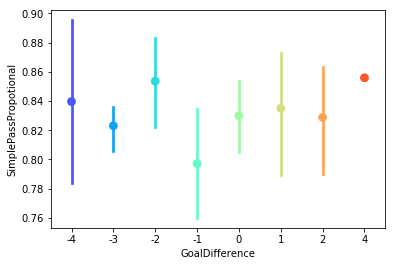

In [136]:
sns.pointplot(data = season,x = 'GoalDifference',y = 'SimplePassPropotional',palette='rainbow')

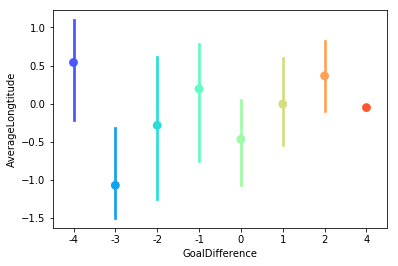

In [134]:
sns.pointplot(data = season,x = 'GoalDifference',y = 'AverageLongtitude',palette='rainbow')

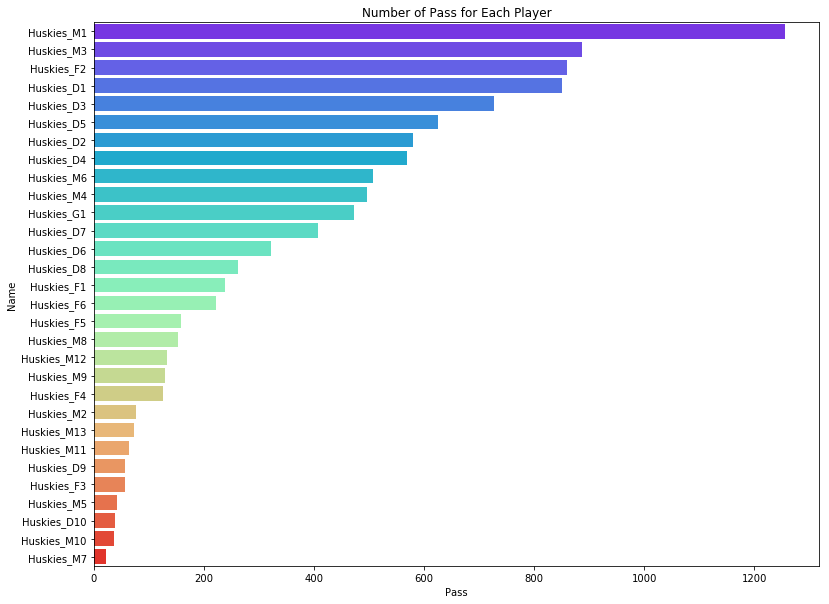

In [122]:
# 彩虹排序图
plt.figure(figsize=(13,10))
plt.title("Number of Pass for Each Player")
players_sorted_by_pass = players_data.sort_values(by='Pass',ascending=False)
sns.barplot(data = players_sorted_by_pass,x='Pass', y='Name', palette='rainbow')

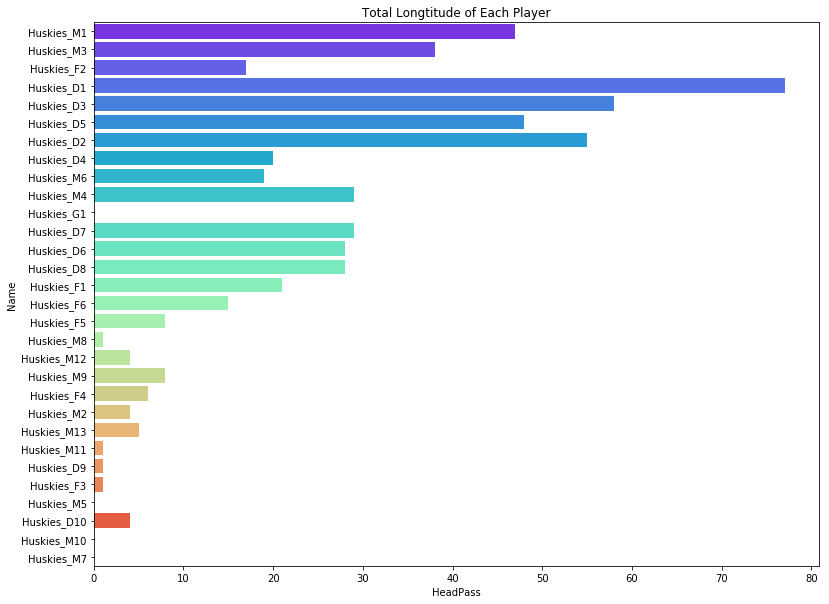

In [129]:
plt.figure(figsize=(13,10))
plt.title("Total Longtitude of Each Player")
players_sorted= players_data.sort_values(by='Pass',ascending=False)
sns.barplot(data = players_sorted,x='HeadPass', y='Name', palette='rainbow')

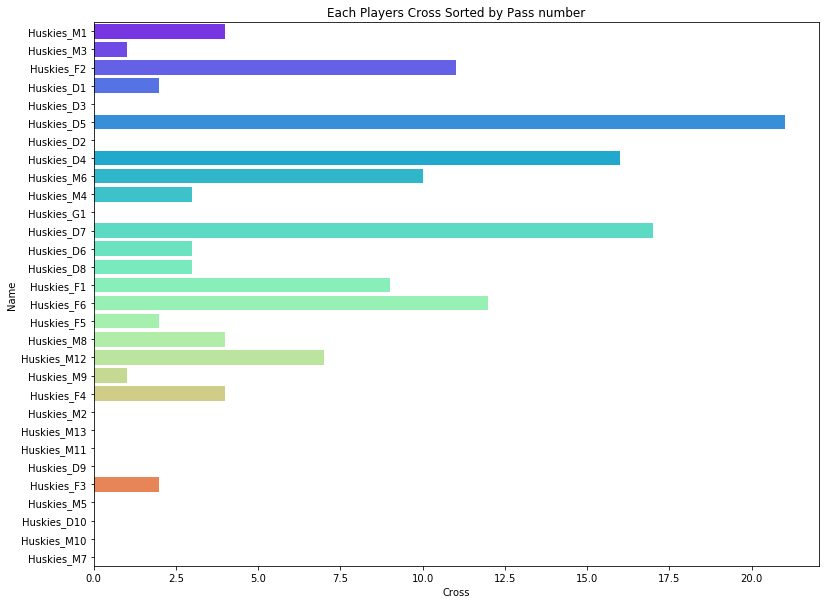

In [133]:
plt.figure(figsize=(13,10))
plt.title("Each Players Cross Sorted by Pass number")
players_sorted = players_data.sort_values(by='Pass',ascending=False)
sns.barplot(data = players_sorted,x='Cross', y='Name', palette='rainbow')

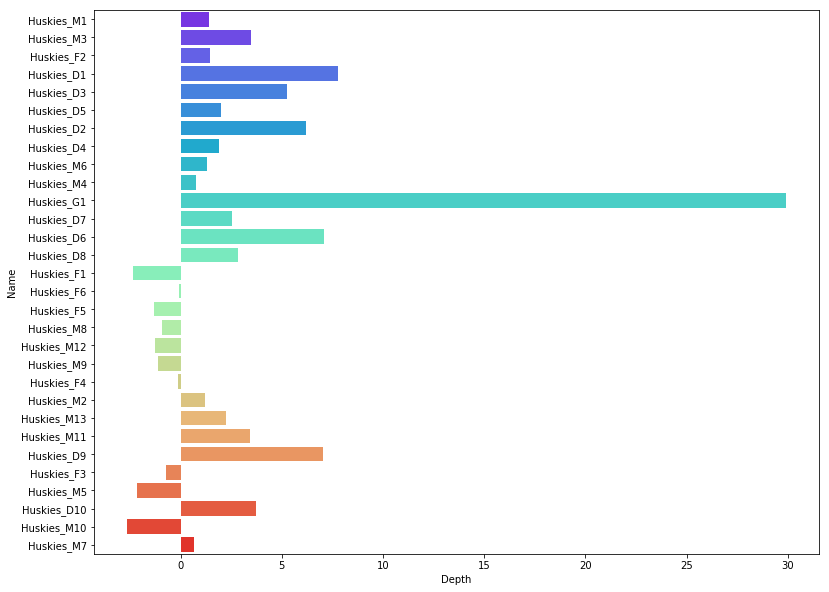

In [119]:
plt.figure(figsize=(13,10))
players_sorted= players_data.sort_values(by='Pass',ascending=False)
sns.barplot(data = players_sorted,x='Depth', y='Name', palette='rainbow')

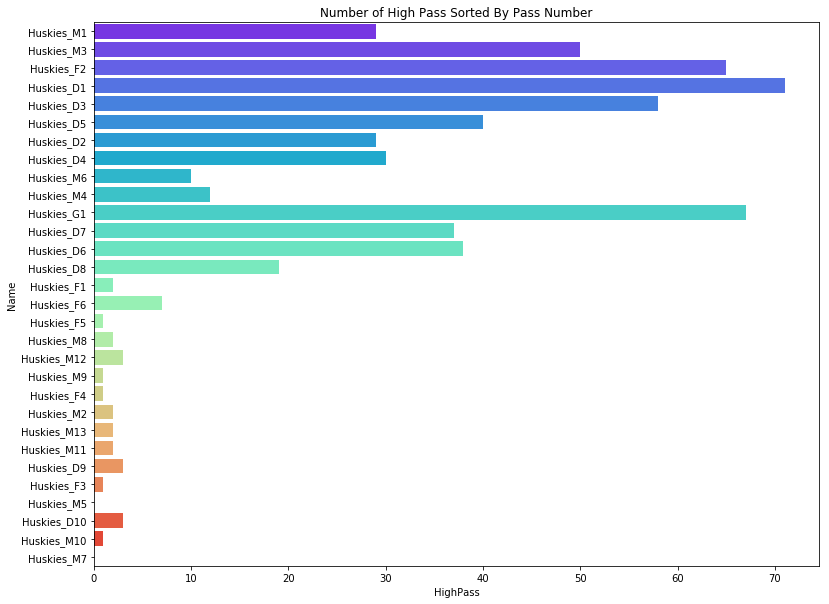

In [128]:
plt.figure(figsize=(13,10))
plt.title("Number of High Pass Sorted By Pass Number")
players_sorted= players_data.sort_values(by='Pass',ascending=False)
sns.barplot(data = players_sorted,x='HighPass', y='Name', palette='rainbow')